# <span style="color: blue;">Projeto de Análise de Dados de Obras do MyAnimeList</span>

[Dataset Source - MyAnimeList Anime & Manga Dataset (July 2025)](https://www.kaggle.com/datasets/hamzaashfaque1999/myanimelist-scraped-data/) \
[Autor: Gregory280](https://github.com/Gregory280)

## <span style="color: blue;">Pré-processamento</span>

**Notebook 1 de 2**

### <span style="color: blue;">Fonte de Dados</span>
Conjunto de dados extraído de um banco de dados de animes e mangás conhecido como MyAnimeList.net.
Os dados extraídos são de animes e mangás disponíveis no site de até julho de 2025.
Contém dois arquivos .csv com um total de 105.983 entradas extraídas, sendo 77.348 entradas de obras.

### <span style="color: blue;">Pacotes</span>

In [1]:
!pip install -q -U watermark

In [2]:
!pip install -q missingno

In [3]:
# Pacotes utilizados
import ast
from collections import Counter
from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [4]:
%reload_ext watermark
%watermark -a "Gregory280"

Author: Gregory280



### <span style="color: blue;">Carregando Dados</span>

In [5]:
# Carrega o dataset de animes
df = pd.read_csv("../data/raw/myanimelist_mangas.csv")

In [6]:
df.shape

(77348, 27)

<p>
    Temos 77.348 mangás registrados e 27 colunas.
</p>

In [7]:
# Colunas
df.columns

Index(['id', 'link', 'title_name', 'score', 'scored_by', 'ranked',
       'popularity', 'members', 'favorited', 'synonymns', 'japanese_name',
       'english_name', 'german_name', 'french_name', 'spanish_name',
       'item_type', 'volumes', 'chapters', 'status', 'publishing_date',
       'authors', 'serialization', 'genres', 'themes', 'demographic',
       'description', 'background'],
      dtype='object')

In [8]:
df.head(3)

,id,link,title_name,score,scored_by,ranked,popularity,members,favorited,synonymns,...,chapters,status,publishing_date,authors,serialization,genres,themes,demographic,description,background
0,2,https://myanimelist.net/manga/2/Berserk,Berserk,9.47,380203,1.0,1,759620,134133,Berserk: The Prototype,...,Unknown,Publishing,"Aug 25, 1989 to ?","[""Miura, Kentarou"", ""Studio Gaga""]","[""Young Animal""]","[""Action"", ""Adventure"", ""Award Winning"", ""Dram...","[""Gore"", ""Military"", ""Psychological""]","[""Seinen""]","Guts, a former mercenary now known as the Blac...",Berserk won the Excellence Award at the sixth ...
1,1706,https://myanimelist.net/manga/1706/JoJo_no_Kim...,JoJo no Kimyou na Bouken Part 7: Steel Ball Ru...,9.32,182880,2.0,22,299518,48617,JoJo's Bizarre Adventure Part 7: Steel Ball Ru...,...,96,Finished,"Jan 19, 2004 to Apr 19, 2011","[""Araki, Hirohiko""]","[""Ultra Jump""]","[""Action"", ""Adventure"", ""Mystery"", ""Supernatur...","[""Historical""]","[""Seinen"", ""Shounen""]","In the American Old West, the world's greatest...",JoJo no Kimyou na Bouken Part 7: Steel Ball Ru...
2,656,https://myanimelist.net/manga/656/Vagabond,Vagabond,9.27,164618,3.0,13,431494,46474,NaN,...,327,On Hiatus,"Sep 3, 1998 to May 21, 2015","[""Inoue, Takehiko"", ""Yoshikawa, Eiji""]","[""Morning""]","[""Action"", ""Adventure"", ""Award Winning""]","[""Historical"", ""Samurai""]","[""Seinen""]","In 16th-century Japan, Shinmen Takezou is a wi...",Vagabond won the Japan Media Arts Festival Man...


In [9]:
# Retorna informações sobre as colunas do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77348 entries, 0 to 77347
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               77348 non-null  int64  
 1   link             77348 non-null  object 
 2   title_name       77348 non-null  object 
 3   score            28466 non-null  float64
 4   scored_by        77348 non-null  int64  
 5   ranked           54165 non-null  float64
 6   popularity       77348 non-null  int64  
 7   members          77348 non-null  int64  
 8   favorited        77348 non-null  int64  
 9   synonymns        39861 non-null  object 
 10  japanese_name    76301 non-null  object 
 11  english_name     24944 non-null  object 
 12  german_name      36 non-null     object 
 13  french_name      47 non-null     object 
 14  spanish_name     82 non-null     object 
 15  item_type        77348 non-null  object 
 16  volumes          77348 non-null  object 
 17  chapters    

## <span style="color: blue;">Etapa de Pré-Processamento</span>

In [10]:
# Criamos uma série de valores booleanos indicando duplicatas presentes
duplicatas = df.duplicated()

In [11]:
df[duplicatas]

,id,link,title_name,score,scored_by,ranked,popularity,members,favorited,synonymns,...,chapters,status,publishing_date,authors,serialization,genres,themes,demographic,description,background


Com isso temos certeza que não há linhas duplicadas no dataset.

### <span style="color: blue;">Valores Negativos</span>

In [12]:
# Verificar valores negativos na coluna score
df[df['score'] < 0]

,id,link,title_name,score,scored_by,ranked,popularity,members,favorited,synonymns,...,chapters,status,publishing_date,authors,serialization,genres,themes,demographic,description,background


In [13]:
# Verificar valores negativos na coluna scored_by
df[df['scored_by'] < 0]

,id,link,title_name,score,scored_by,ranked,popularity,members,favorited,synonymns,...,chapters,status,publishing_date,authors,serialization,genres,themes,demographic,description,background


In [14]:
# Verificar valores negativos na coluna ranked
df[df['ranked'] < 0]

,id,link,title_name,score,scored_by,ranked,popularity,members,favorited,synonymns,...,chapters,status,publishing_date,authors,serialization,genres,themes,demographic,description,background


In [15]:
# Verificar valores negativos na coluna popularity
df[df['popularity'] < 0]

,id,link,title_name,score,scored_by,ranked,popularity,members,favorited,synonymns,...,chapters,status,publishing_date,authors,serialization,genres,themes,demographic,description,background


In [16]:
# Verificar valores negativos na coluna members
df[df['members'] < 0]

,id,link,title_name,score,scored_by,ranked,popularity,members,favorited,synonymns,...,chapters,status,publishing_date,authors,serialization,genres,themes,demographic,description,background


In [17]:
# Verificar valores negativos na coluna favorited
df[df['favorited'] < 0]

,id,link,title_name,score,scored_by,ranked,popularity,members,favorited,synonymns,...,chapters,status,publishing_date,authors,serialization,genres,themes,demographic,description,background


### <span style="color: blue;">Valores Ausentes</span>

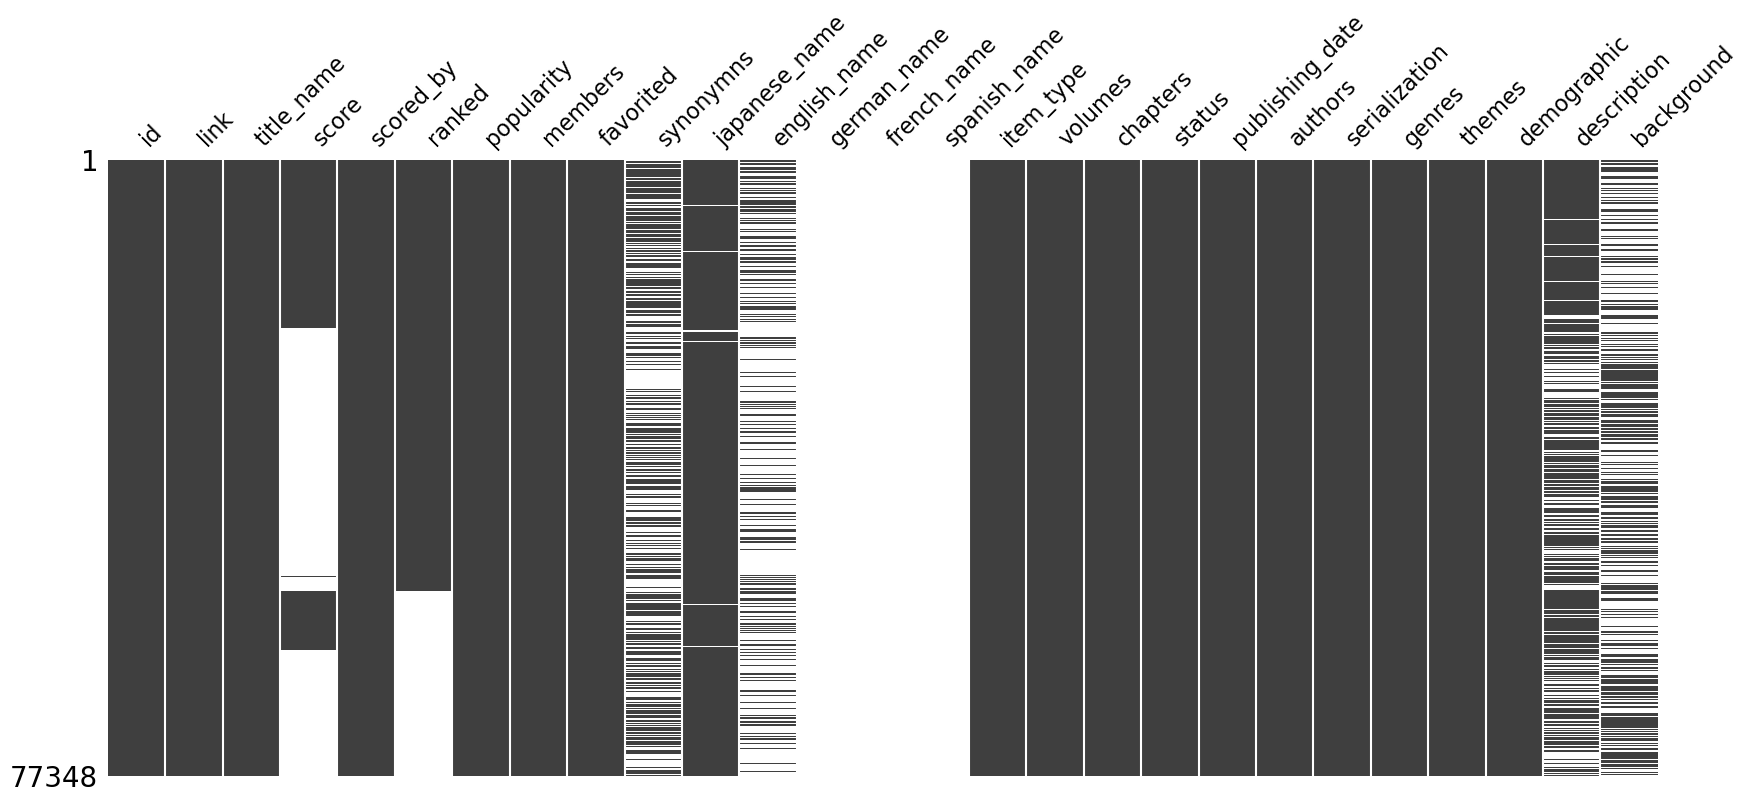

In [18]:
# Mapa de valores ausentes
msno.matrix(df, figsize = (20, 8), sparkline = False)
plt.show()

Há muitas colunas com valores nulos.
Vamos calcular os valores nulos.

In [19]:
# Função que calcula o percentual de valores ausentes
def calc_valores_ausentes(df):
    totalCells = np.prod(df.shape)
    missingCount = df.isnull().sum()
    totalMissing = missingCount.sum()
    print("O dataset tem", round(((totalMissing/totalCells) * 100), 2), "%", "de valores ausentes.")

In [20]:
calc_valores_ausentes(df)

O dataset tem 21.81 % de valores ausentes.


In [21]:
# Função para calcular os valores ausentes por coluna
def calc_valores_ausentes_por_coluna(df):
    total_valores_ausentes = df.isnull().sum()
    porcentagem_valores_ausentes = 100 * total_valores_ausentes / len(df)
    dtype_valores_ausentes = df.dtypes
    tabela = pd.concat([total_valores_ausentes, porcentagem_valores_ausentes, dtype_valores_ausentes], axis=1)
    tabela_renomeada= tabela.rename(columns = {0: 'Valores Ausentes', 1 : '%', 2: 'Dtype'})
    tabela_renomeada = tabela_renomeada[tabela_renomeada.iloc[:,0] != 0].sort_values('%', ascending = False).round(2)
    print(
        "O dataset possui tem " + str(df.shape[1]) + " colunas.\n"
        "Encontrado: " + str(tabela_renomeada.shape[0]) + " colunas que têm valores ausentes"
         )
    if tabela_renomeada.shape[0] == 0:
        return
    return tabela_renomeada

In [22]:
# Cria a tabela com valores ausentes
df_valores_ausentes = calc_valores_ausentes_por_coluna(df)

O dataset possui tem 27 colunas.
Encontrado: 10 colunas que têm valores ausentes


In [23]:
# Visualizamos a tabela de valores ausentes
df_valores_ausentes

,Valores Ausentes,%,Dtype
german_name,77312,99.95,object
french_name,77301,99.94,object
spanish_name,77266,99.89,object
english_name,52404,67.75,object
score,48882,63.20,float64
synonymns,37487,48.47,object
background,37372,48.32,object
ranked,23183,29.97,float64
description,23181,29.97,object
japanese_name,1047,1.35,object


Colunas próximas ou com mais de 50% de valores nulos serão descartadas, com exceção da coluna score.

In [24]:
# Colunas que serão removidas
colunas_para_remover = df_valores_ausentes[df_valores_ausentes['%'] >= 48].index.tolist()

In [25]:
colunas_para_remover

['german_name',
 'french_name',
 'spanish_name',
 'english_name',
 'score',
 'synonymns',
 'background']

In [26]:
colunas_para_remover = [col for col in colunas_para_remover if col not in ['score']]

In [27]:
colunas_para_remover

['german_name',
 'french_name',
 'spanish_name',
 'english_name',
 'synonymns',
 'background']

A coluna a respeito da score não está mais inclusa na lista para remoção.

### <span style="color: blue;">Removendo Colunas</span>

In [28]:
df.columns

Index(['id', 'link', 'title_name', 'score', 'scored_by', 'ranked',
       'popularity', 'members', 'favorited', 'synonymns', 'japanese_name',
       'english_name', 'german_name', 'french_name', 'spanish_name',
       'item_type', 'volumes', 'chapters', 'status', 'publishing_date',
       'authors', 'serialization', 'genres', 'themes', 'demographic',
       'description', 'background'],
      dtype='object')

Vamos remover as colunas description e link, pois não possuem importância para as análises.

In [29]:
colunas_para_remover.extend(['description', 'link'])

In [30]:
colunas_para_remover

['german_name',
 'french_name',
 'spanish_name',
 'english_name',
 'synonymns',
 'background',
 'description',
 'link']

In [31]:
# Realizando o drop de colunas e criando um novo dataframe
df_limpo = df.drop(colunas_para_remover, axis = 1)

In [32]:
df_limpo.shape

(77348, 19)

In [33]:
calc_valores_ausentes(df_limpo)

O dataset tem 4.97 % de valores ausentes.


In [34]:
calc_valores_ausentes_por_coluna(df_limpo)

O dataset possui tem 19 colunas.
Encontrado: 3 colunas que têm valores ausentes


,Valores Ausentes,%,Dtype
score,48882,63.20,float64
ranked,23183,29.97,float64
japanese_name,1047,1.35,object


Score é uma variável subjetiva, baseada na opinião do público, portanto não daria para tratar os valores ausentes sem distorcer a realidade e afetar análises estatísticas e de correlações. O mesmo vale para a variável ranked.

### <span style="color: blue;">Tratamento dos Valores Ausentes</span>

Adicionando valor Unknow (Desconhecido) para os valores ausentes das variáveis qualitativas.

In [35]:
# Pega somente as coluna do tipo object com valores ausentes
colunas_object = df_limpo.select_dtypes(include="object").columns[df_limpo.select_dtypes(include="object").isna().any()].tolist()

In [36]:
colunas_object

['japanese_name']

In [37]:
# Preenche os valores ausentes com Unkown
df_limpo[colunas_object] = df_limpo[colunas_object].fillna("Unknown")

In [38]:
calc_valores_ausentes_por_coluna(df_limpo)

O dataset possui tem 19 colunas.
Encontrado: 2 colunas que têm valores ausentes


,Valores Ausentes,%,Dtype
score,48882,63.20,float64
ranked,23183,29.97,float64


Os valores de score e ranked não serão modificados, pois a ausência de valores deles representa informação. São animes que não tiveram votos suficientes para calcular sua avaliação. Poderiamos criar uma nova coluna e atribuir aos valores ausentes a nota 0, tendo em mente que 0 representa estes animes são score suficiente e não score 0 de fato por ser ruim.

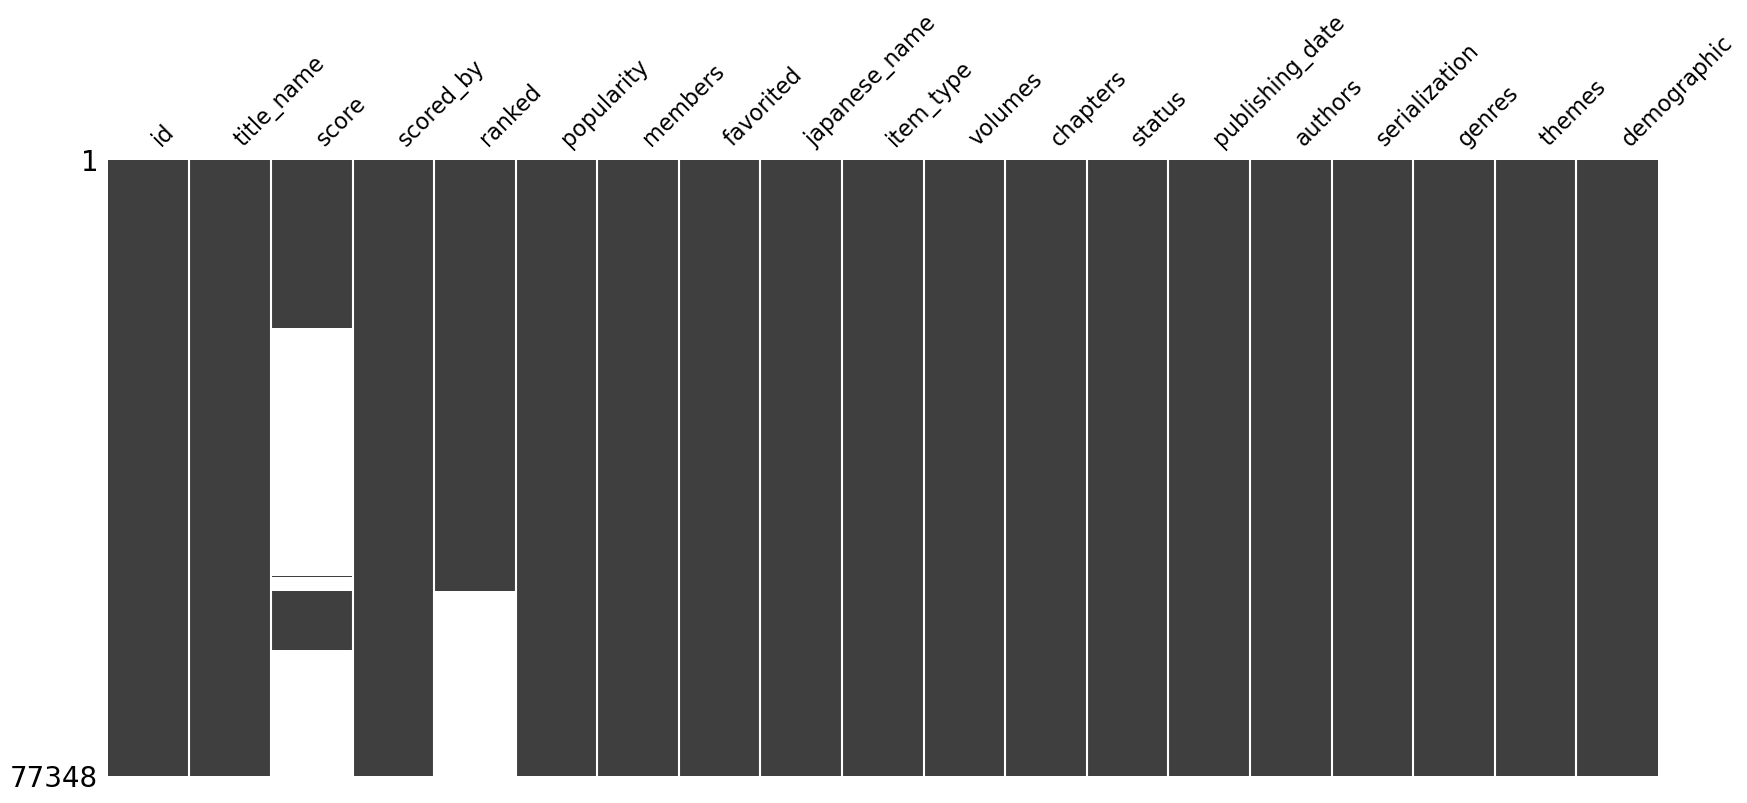

In [39]:
msno.matrix(df_limpo, figsize = (20, 8), sparkline = False)
plt.show()

### Formatando Colunas

In [40]:
df_limpo['themes'] = df_limpo['themes'].apply(lambda x: ast.literal_eval(x))

In [41]:
df_limpo['genres'] = df_limpo['genres'].apply(lambda x: ast.literal_eval(x))

In [59]:
df_limpo['serialization'] = df_limpo['serialization'].apply(lambda x: ast.literal_eval(x))

In [42]:
df_limpo['demographic'] = df_limpo['demographic'].apply(lambda x: ast.literal_eval(x))

In [43]:
df_limpo['volumes'] = pd.to_numeric(df_limpo['volumes'], errors='coerce')

In [44]:
df_limpo['chapters'] = pd.to_numeric(df_limpo['chapters'], errors='coerce')

In [45]:
df_limpo['authors'] = df_limpo['authors'].apply(lambda x: ast.literal_eval(x))

In [61]:
# Pega o primeiro ano das strings
df_limpo['start_year'] = (df_limpo['publishing_date'].str.extract(r'(\d{4})'))

In [62]:
df_limpo['start_year'] = pd.to_numeric(df_limpo['start_year'])

### <span style="color: blue;">Categorizando Variáveis</span>

Algumas colunas numéricas como scored_by (que representam a quantidade de pessoas que deram nota para o anime), volumes e chapters são muito específicas para trabalhar.
Para enriquecer o trabalho de análise irei criar faixas de valores para representar estas informações

Criando coluna <i>scored_by_faixa</i>

In [46]:
# Definimos as faixas/grupos para a variável scored_by
bins = [0, 500, 1_000, 3_000, 10_000, 25_000, np.inf]
labels = ["Até 500", "Até 1.000", "Até 3.000", "Até 10.000", "Até 25.000", "Mais 25.000"]

In [47]:
df_limpo['scored_by_faixa'] = pd.cut(df_limpo['scored_by'], bins=bins, labels=labels, right=False)

In [48]:
# Adiciona uma nova faixa para as obras com 0 scored_by
df_limpo['scored_by_faixa'] = df_limpo['scored_by_faixa'].cat.add_categories('0')
df_limpo.loc[df_limpo['scored_by'] == 0, 'scored_by_faixa'] = '0'

Criando a coluna <i>chapters_faixa</i>

In [49]:
# Definimos as faixas/grupos para a variável chapters
bins = [0, 10, 25, 50, 100, 200, 300, np.inf]
labels = ["Até 10", "Até 25", "Até 50", "Até 100", "Até 200", "Até 300", "Mais de 300"]

In [50]:
df_limpo['chapters_faixa'] = pd.cut(df_limpo['chapters'], bins=bins, labels=labels, right=True, include_lowest=True)

In [51]:
df_limpo['chapters_faixa'] = df_limpo['chapters_faixa'].cat.add_categories("Desconhecido")
df_limpo['chapters_faixa'] = df_limpo['chapters_faixa'].fillna("Desconhecido")

Criando a coluna <i>volumes_faixa</i>

In [52]:
# Definimos as faixas/grupos para a variável volumes
bins = [0, 1, 3, 5, 10, 15, 20, np.inf]
labels = ["1", "Até 3", "Até 5", "Até 10", "Até 15", "Até 20", "Mais de 20"]

In [53]:
df_limpo['volumes_faixa'] = pd.cut(df_limpo['volumes'], bins=bins, labels=labels, right=True, include_lowest=True)

In [54]:
# Valores NaN irão para faixa Desconhecido
df_limpo['volumes_faixa'] = df_limpo['volumes_faixa'].cat.add_categories("Desconhecido")
df_limpo['volumes_faixa'] = df_limpo['volumes_faixa'].fillna("Desconhecido")

## Fim

In [63]:
# Salva a variável df_limpo
%store df_limpo

Stored 'df_limpo' (DataFrame)


In [56]:
df_limpo.to_csv('../data/processed/myanimelist_mangas_limpo.csv', index=False, encoding='utf-8')

In [57]:
%watermark -a "Gregory280"

Author: Gregory280



In [58]:
%watermark --iversions

missingno : 0.5.2
numpy     : 2.1.3
matplotlib: 3.10.0
sklearn   : 1.6.1
pandas    : 2.2.3
seaborn   : 0.13.2

